In [1]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
new_font = fm.FontProperties(fname = 'C:\\Users\\Андрей\\Desktop\\GOST_B_.ttf')
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def radians(i):
    return i / 360 * 2 * pi.n(8)

def degrees(i):
    return i / (2 * pi.n(9)) * 360



In [3]:
h = 0.016
alpha = 24
delta = 330
rho = 0.21
omega_1 = 12.566

In [4]:
phi_p = delta / Rational(7, 4)
v_1, v_2 = symbols('v_1, v_2')
phi = symbols('varphi')
a1 = radians(phi_p / 4) * v_1 + v_1 * radians(phi_p / 2)
a2 = radians(phi_p / 8) * v_2 + v_2 * radians(phi_p / 4)
s1 = solve([a1 - a2, a1 - h], [v_1, v_2])
var1 = [0, (phi_p / 4).n(5), (3 * phi_p / 4).n(5), phi_p, 1.25 * phi_p.n(5), 1.375 * phi_p.n(5), 1.625 * phi_p.n(5), delta]
var1 = [radians(i) for i in var1]
var2 = [0, s1[v_1], s1[v_1], 0, 0, -s1[v_2], -s1[v_2], 0]

In [5]:
import matplotlib.font_manager as fm
new_font = fm.FontProperties(fname = 'C:\\Users\\Андрей\\Desktop\\GOST_B_.ttf')

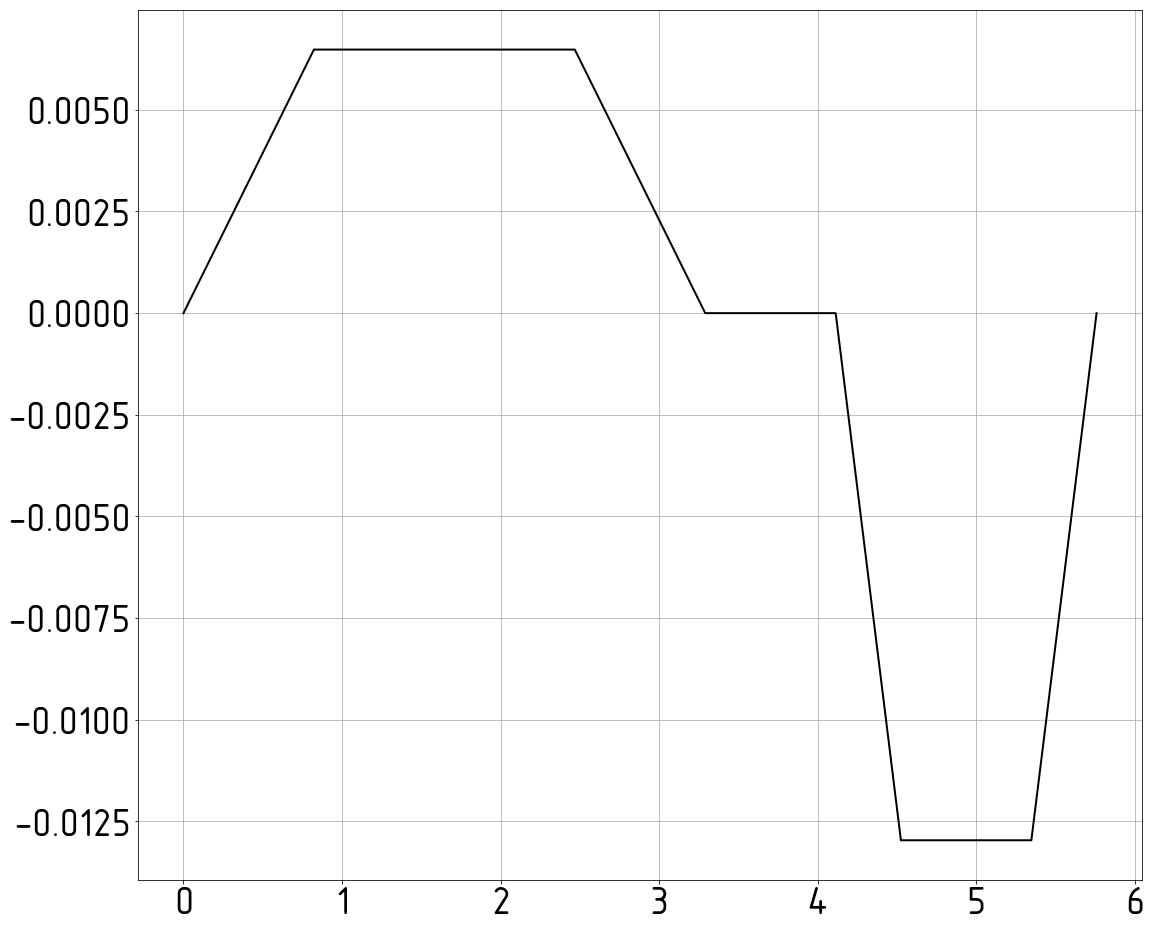

In [6]:
var1 = [0, (phi_p / 4).n(5), (3 * phi_p / 4).n(5), phi_p, 1.25 * phi_p.n(5), 1.375 * phi_p.n(5), 1.625 * phi_p.n(5), delta]
var1 = [radians(i) for i in var1]
var2 = [0, s1[v_1], s1[v_1], 0, 0, -s1[v_2], -s1[v_2], 0]


fig_01 = plt.figure(figsize = [18.00, 16.00])
plt.plot(var1, var2, linewidth = 2, color = 'black')
plt.grid(True)
for obj in fig_01.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(40)
plt.show()

In [7]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = new_font.get_family()

with PdfPages('test.pdf') as pdf:
    fig_01.savefig('pic/v_cul.pdf')

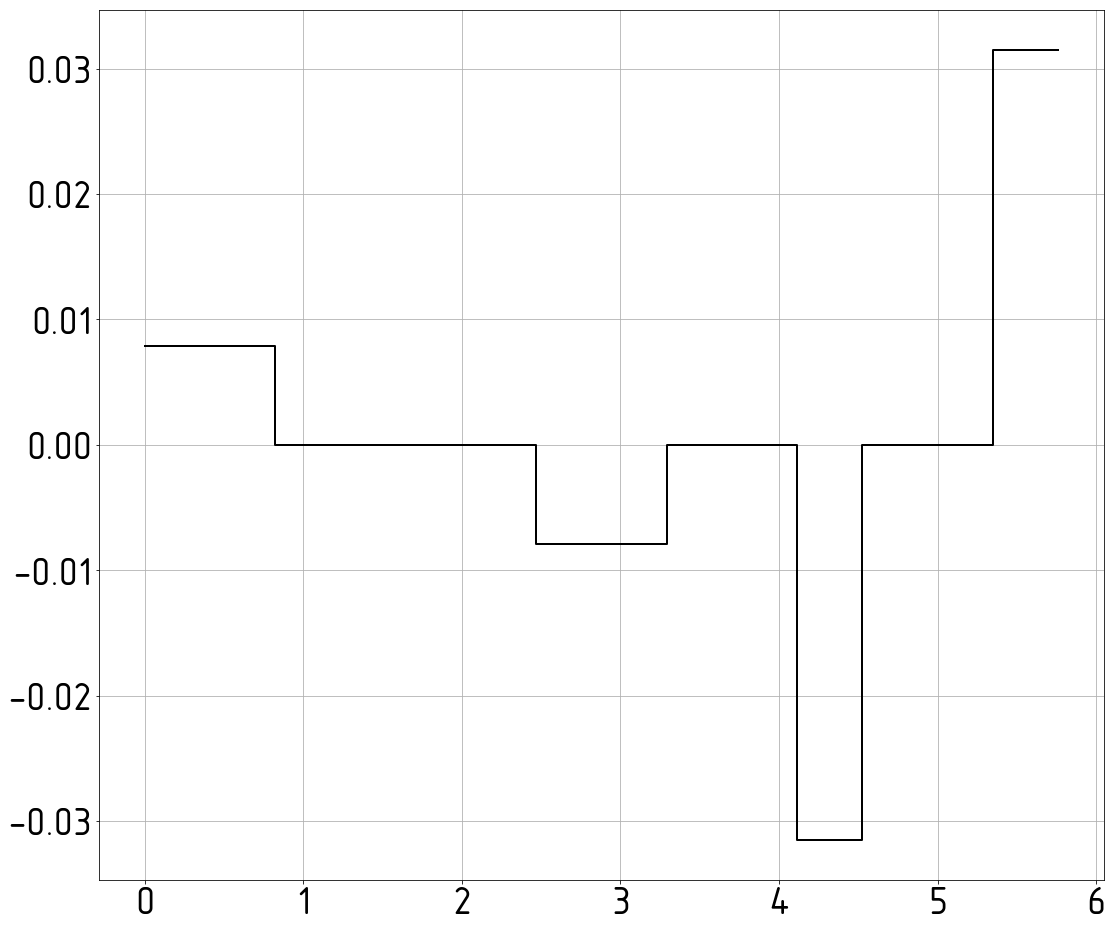

In [45]:
v1, v2 = s1[v_1], s1[v_2]
var1 = [0, (phi_p / 4).n(5), (phi_p / 4).n(5), (3 * phi_p / 4).n(5), (3 * phi_p / 4).n(5),
        phi_p, phi_p, 1.25 * phi_p.n(5), 1.25 * phi_p.n(5), 1.375 * phi_p.n(5), 1.375 * phi_p.n(5), 1.625 * phi_p.n(5),
        1.625 * phi_p.n(5), delta]
var1 = [radians(i) for i in var1]
var2 = [v1 / radians(phi_p / 4), v1 / radians(phi_p / 4), 0, 0, -v1 / radians(phi_p / 4),
        -v1 / radians(phi_p / 4), 0, 0, -v2 / radians(phi_p / 8), -v2 / radians(phi_p / 8), 0, 0, v2 / radians(phi_p / 8),
       v2 / radians(phi_p / 8)]

fig_01 = plt.figure(figsize = [18.00, 16.00])
plt.plot(var1, var2, linewidth = 2, color = 'black')
plt.grid(True)
for obj in fig_01.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(40)
plt.show()

In [47]:
with PdfPages('test.pdf') as pdf:
    fig_01.savefig('pic/a_cul.pdf')

In [19]:
class complex_function(object):
    def __init__(self, func, interval):
        self.func = tuple(func)
        self.interval = tuple(interval)
        
    def integrate(self):
        a1 = [Integral(i, phi).doit() for i in self.func]
        c = symbols('c')
        for i in range(1, len(a1)):
#            print(a1[i], a1[i - 1])
            s1 = solve([a1[i].subs(phi, self.interval[i][0]) + c - a1[i - 1].subs(phi, self.interval[i - 1][1])], [c])
            a1[i] += s1[c]
        self.func = tuple(a1)


    def plot(self):
        last = 0
        arrx = [radians(i) for i in range(0, 330, 1)]
        arry = []
        for i in arrx:
            if i >= self.interval[last][1]:
                last += 1
            try:
                arry.append(self.func[last].subs(phi, i))
            except:
                print(last)
                arry.append(self.func[last])
        return arrx, arry

In [20]:
v1, v2 = s1[v_1], s1[v_2]
var1 = [(0, (phi_p / 4).n(5)), ((phi_p / 4).n(5), (3 * phi_p / 4).n(5)),
        ((3 * phi_p / 4).n(5), phi_p),  (phi_p, 1.25 * phi_p.n(5)), 
        (1.25 * phi_p.n(5), 1.375 * phi_p.n(5)), (1.375 * phi_p.n(5), 1.625 * phi_p.n(5)),
        (1.625 * phi_p.n(5), delta)]
var1 = [(radians(i[0]), radians(i[1])) for i in var1]
var2 = [v1 / radians(phi_p / 4), 0, -v1 / radians(phi_p / 4), 0, -v2 / radians(phi_p / 8),  0, v2 / radians(phi_p / 8)]

In [21]:
compl_f = complex_function(var2, var1)

In [22]:
compl_f.integrate()

In [23]:
compl_f_1 = complex_function(compl_f.func, compl_f.interval)

In [24]:
a1, a2 = compl_f.plot()

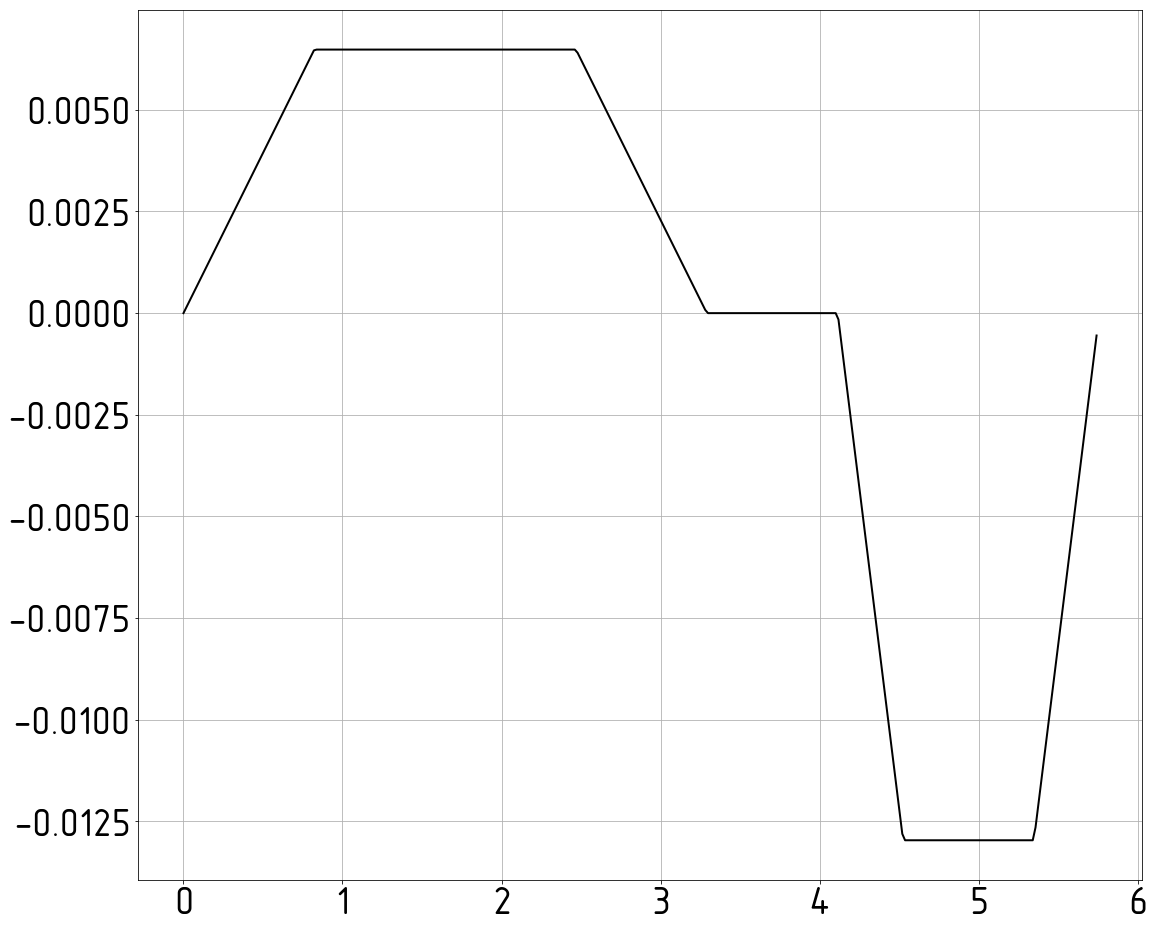

In [44]:
fig_01 = plt.figure(figsize = [18, 16.00])
plt.plot(a1, a2, linewidth = 2, color = 'black')
plt.grid(True)
for obj in fig_01.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(40)
plt.show()

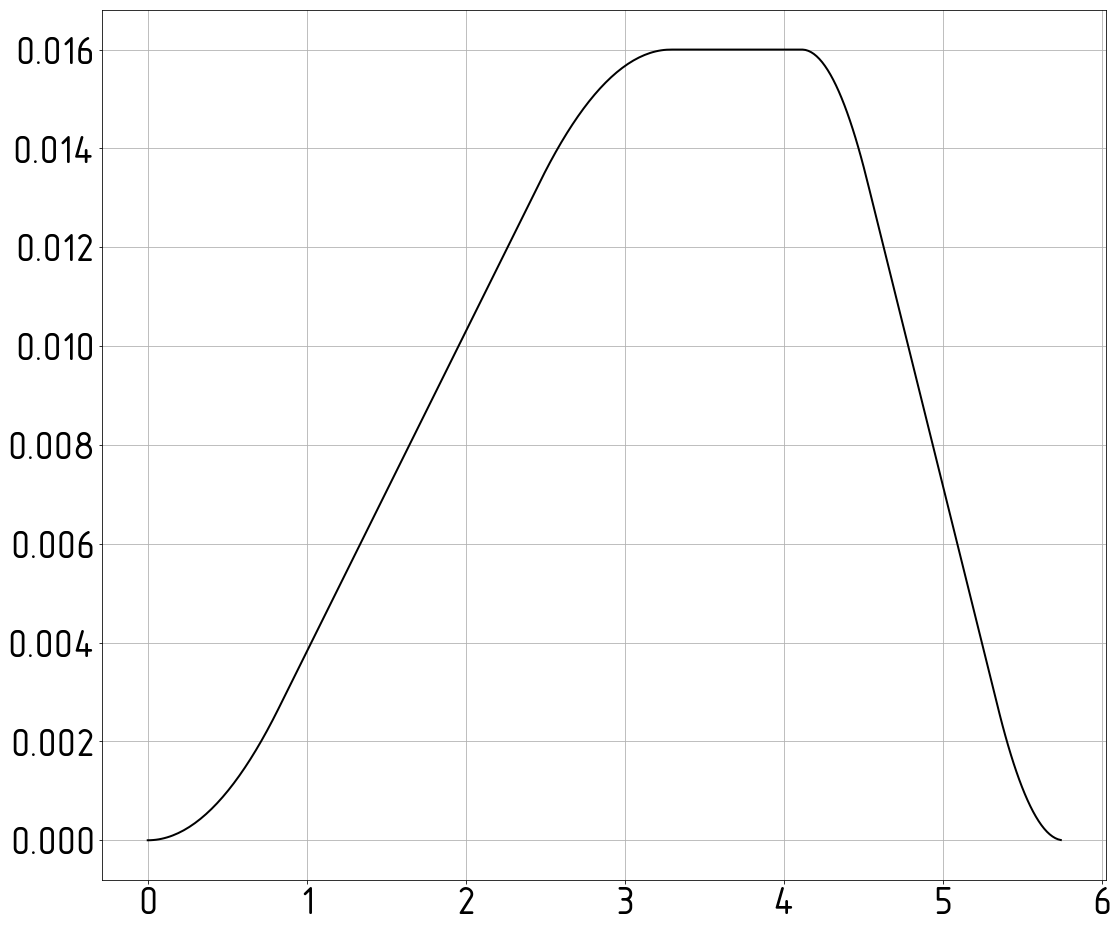

In [26]:
from matplotlib import rcParams
rcParams['font.family'] = 'GOST type B'
#rcParams['font.sans-serif'] = ['Tahoma']

compl_f.integrate()
a1, a2 = compl_f.plot()
fig_03 = plt.figure(figsize = [18.00, 16.00])
plt.plot(a1, a2, linewidth = 2, color = 'black')
plt.grid(True)
for obj in fig_03.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(40)
plt.show()

In [27]:
with PdfPages('test.pdf') as pdf:
    fig_03.savefig('pic/s_cul.pdf')

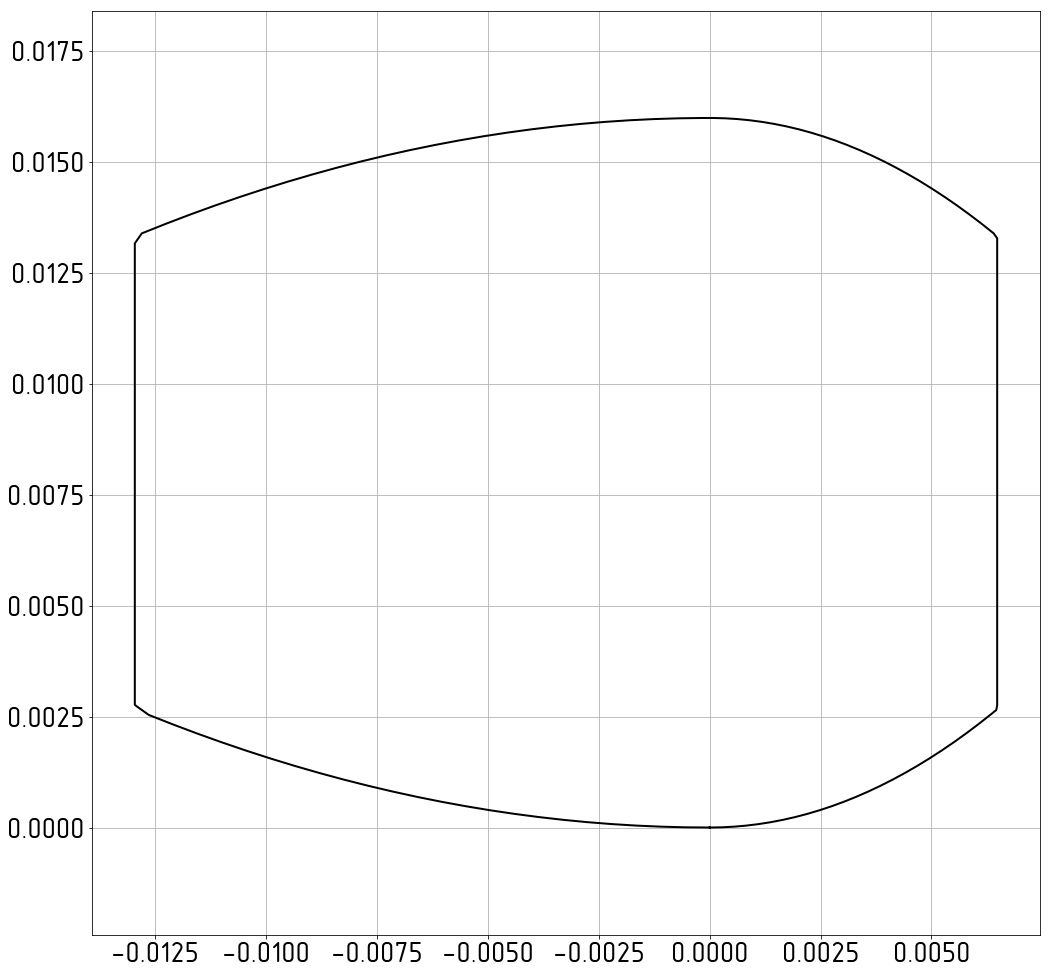

In [31]:
a1, a2 = compl_f_1.plot()
a3, a4 = compl_f.plot()
fig_03 = plt.figure(figsize = [17.00, 17.00])
plt.plot(a2 + [a2[0]], a4 + [a4[0]], linewidth = 2, color = 'black')
plt.axis('equal')
plt.grid(True)
for obj in fig_03.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(30)
plt.show()

In [32]:
with PdfPages('test.pdf') as pdf:
    fig_03.savefig('pic/v=v(s).pdf')

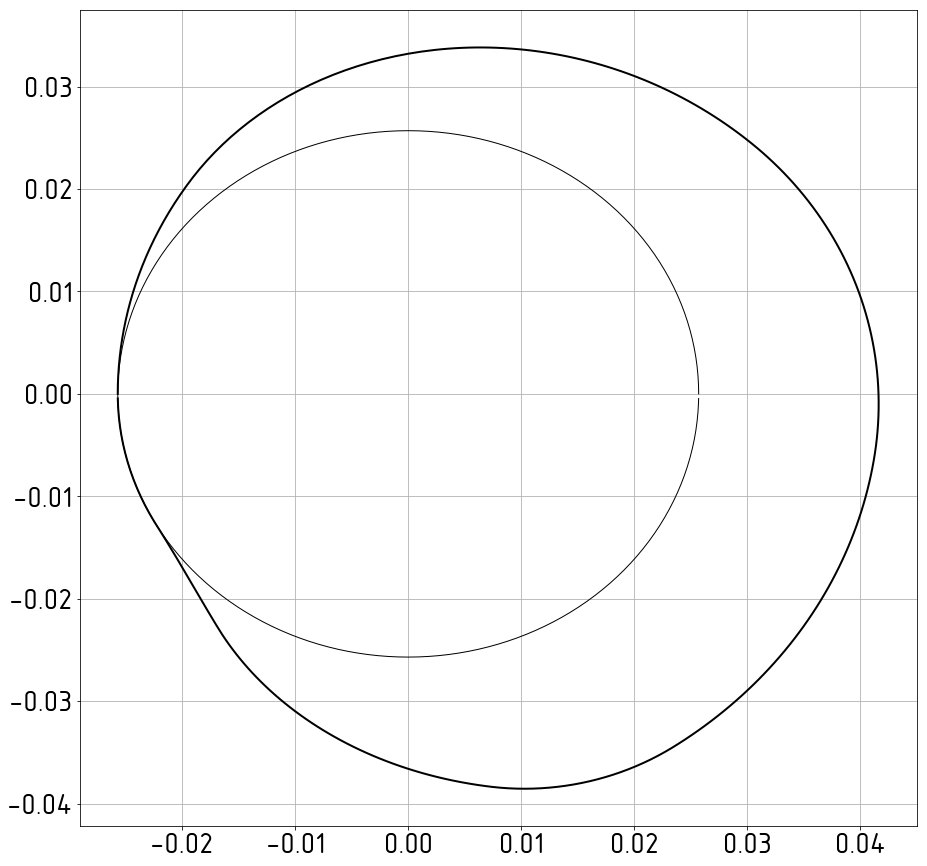

In [34]:
r_0 = 0.0257
s_b = [r_0 + i for i in a4]
s_b += [r_0] * 30
phi = [radians(i) for i in range(360)]

x = [-s_b[i] * cos(phi[i]).n(9) for i in range(len(s_b))]
y = [s_b[i] * sin(phi[i]).n(9) for i in range(len(s_b))]

fig_04 = plt.figure(figsize = [15.00, 15.00])
plt.plot(x, y, linewidth = 2, color = 'black')
#plt.axis('equal')
plt.plot([r_0 * cos(i).n(9) for i in phi], [r_0 * sin(i).n(9) for i in phi], linewidth=1, color='black')
plt.grid(True)
for obj in fig_04.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(30)
plt.show()

In [35]:
with PdfPages('test.pdf') as pdf:
    fig_04.savefig('pic/prof_cul.pdf')

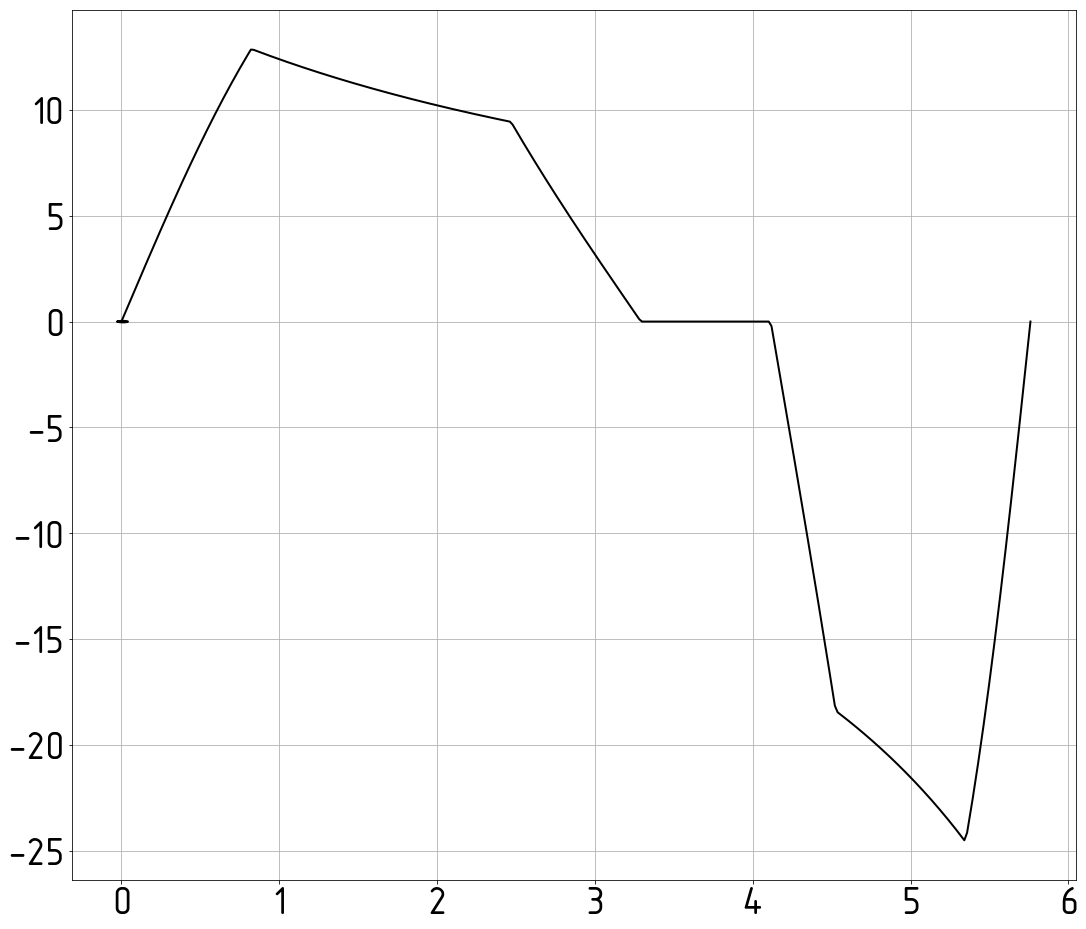

In [42]:
s_b = [r_0 + i for i in a4]

varx = [radians(i) for i in range(len(s_b) + 1)]
vary = [degrees(atan(a2[i] / s_b[i])) for i in range(len(s_b))] + [0]

fig_05 = plt.figure(figsize = [18.00, 16.00])
plt.plot(x, y, linewidth = 2, color = 'black')
plt.axis('auto')
plt.plot(varx, vary, linewidth=2, color='black')
plt.grid(True)
for obj in fig_05.findobj(matplotlib.text.Text):
    obj.set_fontproperties(new_font)
    obj.set_fontsize(40)
plt.show()

In [43]:
with PdfPages('test.pdf') as pdf:
    fig_05.savefig('pic/theta.pdf')

In [53]:
phi_p.n(5) / 2